Unsupervised Nearest Neighbors

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#loading Iris Data sets,
# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) 
# Stored in a 150x4 numpy.ndarray
# The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
data = load_iris()

In [4]:
#print the label or class name of your dataset.
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#print the class or label for the sample or instance 10, 25 and 50.
data.target[[10,25,50]]

array([0, 0, 1])

([], [])

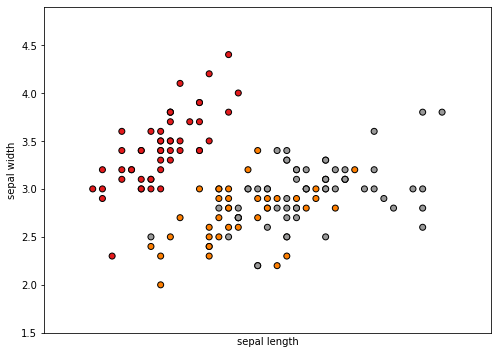

In [10]:
#import some data to play with
X=data.data[:,:2] #we only take the first two features.
y=data.target
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max()+0.5
plt.figure(2,figsize=(8,6))
plt.clf()
#plot the trainig points
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.xticks(())

([], [])

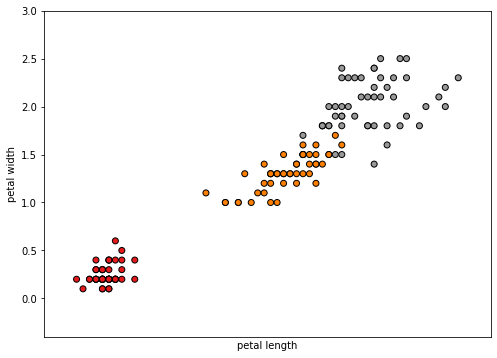

In [11]:
X=data.data[:,2:4] #we only take the first two features.
y=data.target
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max()+0.5
plt.figure(2,figsize=(8,6))
plt.clf()
#plot the trainig points
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.xticks(())

In [13]:
# Dividing the data into training and testing dataset.
X= data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
nbrs = NearestNeighbors(n_neighbors=3, algorithm ='ball_tree').fit(X)

In [14]:
# reshape the input in order to match with the training input data and find the distances and indices from each training points.
distances, indices = nbrs.kneighbors(X_test.reshape(-1,4),return_distance=True)

In [15]:
distances

array([[0.        , 0.2236068 , 0.3       ],
       [0.        , 0.33166248, 0.38729833],
       [0.        , 0.41231056, 0.54772256],
       [0.        , 0.2       , 0.24494897],
       [0.        , 0.31622777, 0.34641016],
       [0.        , 0.28284271, 0.3       ],
       [0.        , 0.42426407, 0.4472136 ],
       [0.        , 0.24494897, 0.36055513],
       [0.        , 0.26457513, 0.50990195],
       [0.        , 0.14142136, 0.26457513],
       [0.        , 0.2236068 , 0.37416574],
       [0.        , 0.14142136, 0.17320508],
       [0.        , 0.3       , 0.31622777],
       [0.        , 0.1       , 0.17320508],
       [0.        , 0.14142136, 0.14142136],
       [0.        , 0.26457513, 0.37416574],
       [0.        , 0.3       , 0.31622777],
       [0.        , 0.17320508, 0.24494897],
       [0.        , 0.3       , 0.31622777],
       [0.        , 0.1       , 0.3       ],
       [0.        , 0.14142136, 0.17320508],
       [0.        , 0.14142136, 0.24494897],
       [0.

In [16]:
indices

array([[ 73,  63,  91],
       [ 18,   5,  10],
       [118, 122, 105],
       [ 78,  91,  63],
       [ 76,  58,  86],
       [ 31,  20,  27],
       [ 64,  82,  79],
       [141, 145, 139],
       [ 68,  87,  72],
       [ 82,  92,  99],
       [110, 147, 115],
       [ 12,   1,   9],
       [ 36,  10,  31],
       [  9,  34,   1],
       [ 19,  21,  46],
       [ 56,  51,  85],
       [104, 132, 128],
       [ 69,  80,  89],
       [ 55,  66,  90],
       [132, 128, 104],
       [ 29,  30,   3],
       [127, 138, 126],
       [ 26,  23,  43],
       [128, 132, 104],
       [131, 117, 105],
       [145, 141, 147],
       [108, 128, 103],
       [143, 120, 124],
       [ 45,   1,  12],
       [ 30,  29,  34],
       [ 22,   6,   2],
       [ 15,  33,  14],
       [ 65,  75,  58],
       [ 11,  29,   7],
       [ 42,  38,  47],
       [146, 123, 111],
       [ 51,  56,  75],
       [ 27,  28,   0],
       [  4,  37,   0],
       [ 32,  46,  33],
       [142, 101, 113],
       [ 85,  56

In [17]:
#now lets work with kNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# used the trained model to predict the label or classes of the test data.
classification_restuls = neigh.predict(X_test)

In [19]:
#Print the trained model to predict the label or classes of the test data.
classification_restuls

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [20]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [22]:
#find the performance of your model
neigh.predict_proba(X_test)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.